In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
from keras import layers, Sequential

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 100
data_dir = os.path.join('data/')
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2,
  subset = "training",
  seed = 123,
  image_size = (IMAGE_SIZE, IMAGE_SIZE),
  batch_size = BATCH_SIZE)
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2,
  subset = "validation",
  seed = 123,
  image_size = (IMAGE_SIZE, IMAGE_SIZE),
  batch_size = BATCH_SIZE)
class_names = train_ds.class_names
print(class_names)

Found 1000 files belonging to 3 classes.
Using 800 files for training.
Found 1000 files belonging to 3 classes.
Using 200 files for validation.
['onion', 'orange', 'unknown']


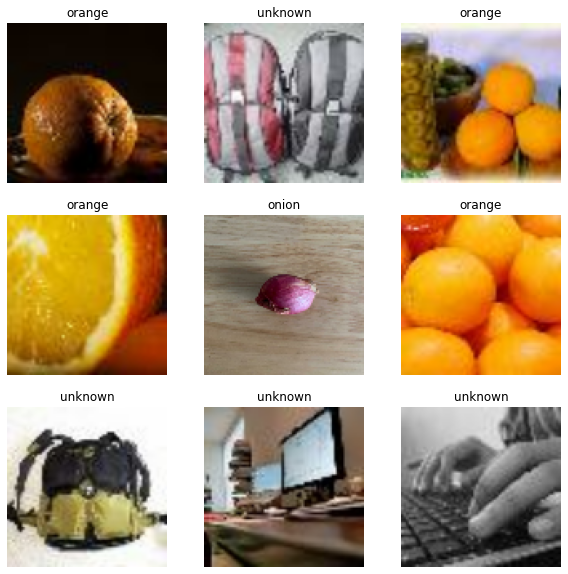

(32, 100, 100, 3)
(32,)


In [3]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show()
for image_batch, labels_batch in train_ds:
  print(image_batch.shape) # batch of 32 images shape of (180x180x3)(RGB)
  print(labels_batch.shape)
  break

In [4]:
# RGB channel are [0, 255], this standardise values to [0, 1]
normalization_layer = layers.Rescaling(1./255)

In [5]:
# Create the model
# The Sequential model consists of three convolution blocks(tf.keras.layers.Conv2D) with a max pooling layer(tf.keras.layers.MaxPooling2D) in each of them. There's a fully-connected layer (tf.keras.layers.Dense) with 128 units on top of it that is activated by a ReLU activation function ('relu'). This model has not been tuned for high accuracy—the goal of this tutorial is to show a standard approach.
num_classes = len(class_names)

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [6]:
# compiling and optimizer
# To view training and validation accuracy for each training epoch, pass the metrics argument to Model.compile.
model.compile(
	optimizer = 'adam',
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
  metrics = ['accuracy'])

In [7]:
# train model
history = model.fit(
	train_ds,
	validation_data=val_ds,
	epochs = 10
)
model.summary()


Epoch 1/10
25/25 [==============================] - 3s 31ms/step - loss: 22.9468 - accuracy: 0.7038 - val_loss: 0.4168 - val_accuracy: 0.9200
Epoch 2/10
25/25 [==============================] - 1s 20ms/step - loss: 0.2397 - accuracy: 0.9312 - val_loss: 0.3002 - val_accuracy: 0.9000
Epoch 3/10
25/25 [==============================] - 1s 21ms/step - loss: 0.1198 - accuracy: 0.9538 - val_loss: 0.2040 - val_accuracy: 0.9050
Epoch 4/10
25/25 [==============================] - 1s 21ms/step - loss: 0.0568 - accuracy: 0.9850 - val_loss: 0.3041 - val_accuracy: 0.9100
Epoch 5/10
25/25 [==============================] - 1s 22ms/step - loss: 0.0328 - accuracy: 0.9900 - val_loss: 0.3323 - val_accuracy: 0.9250
Epoch 6/10
25/25 [==============================] - 1s 22ms/step - loss: 0.0240 - accuracy: 0.9900 - val_loss: 0.3062 - val_accuracy: 0.9200
Epoch 7/10
25/25 [==============================] - 1s 22ms/step - loss: 0.0285 - accuracy: 0.9950 - val_loss: 0.2618 - val_accuracy: 0.9400
Epoch 8/10
2

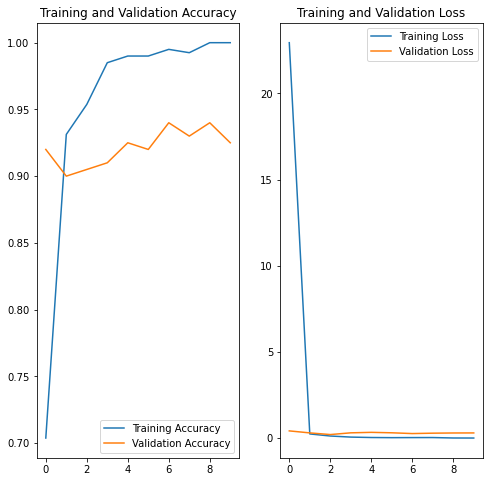

Testing model:
7/7 [==============================] - 0s 4ms/step - loss: 0.2984 - accuracy: 0.9250


In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

print("Testing model:")
model.evaluate(val_ds)
tf.keras.models.save_model(model, 'model.hdf5')